# BigMart Data Science Solution

The aim of this data science project is to build a predictive model and

find out the sales of each product at a particular store.

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
#machine Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

#warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_data.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Handling missing values

In [12]:
# mean value of Item_Weight with mean
train_data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

### Item_Weight is numerical so we will fill it with mean

In [13]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace = True)

### Outlet_Size is catecorical so will will fill it with mode

In [14]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
train_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
#replacing missing values in Outlet_Size with mode
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

In [17]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

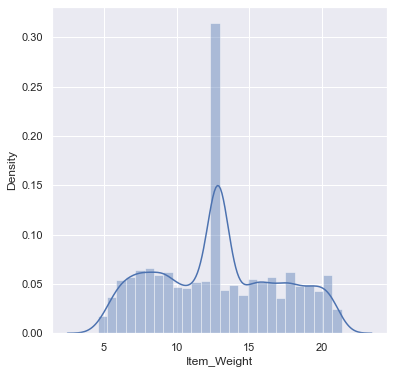

In [20]:
# item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Weight'])
plt.show()

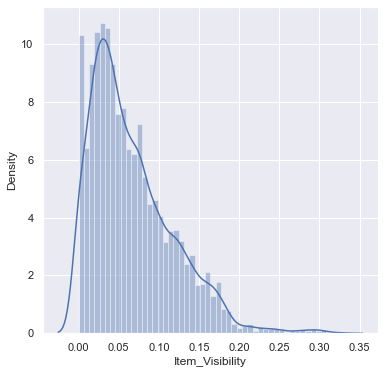

In [21]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Visibility'])
plt.show()

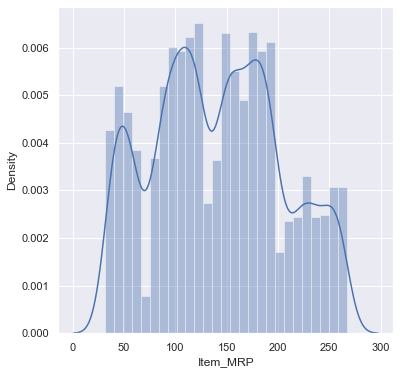

In [22]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_MRP'])
plt.show()

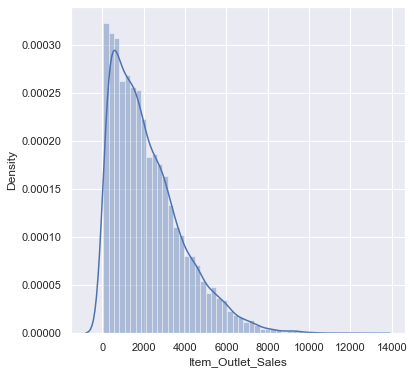

In [23]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Outlet_Sales'])
plt.show()

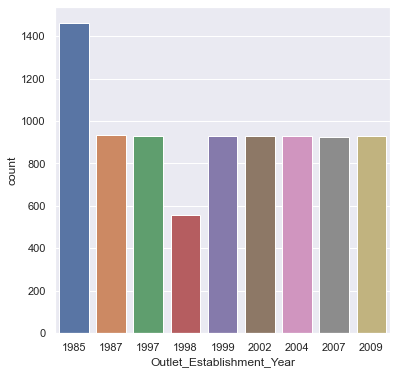

In [24]:
# Outlet_Establishment_Year distribution
#data['Outlet_Establishment_Year']
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year', data = train_data)
plt.show()

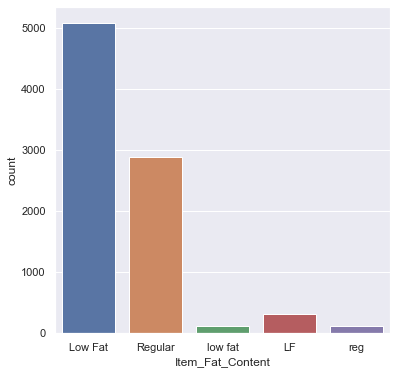

In [25]:
# Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content', data = train_data)
plt.show()

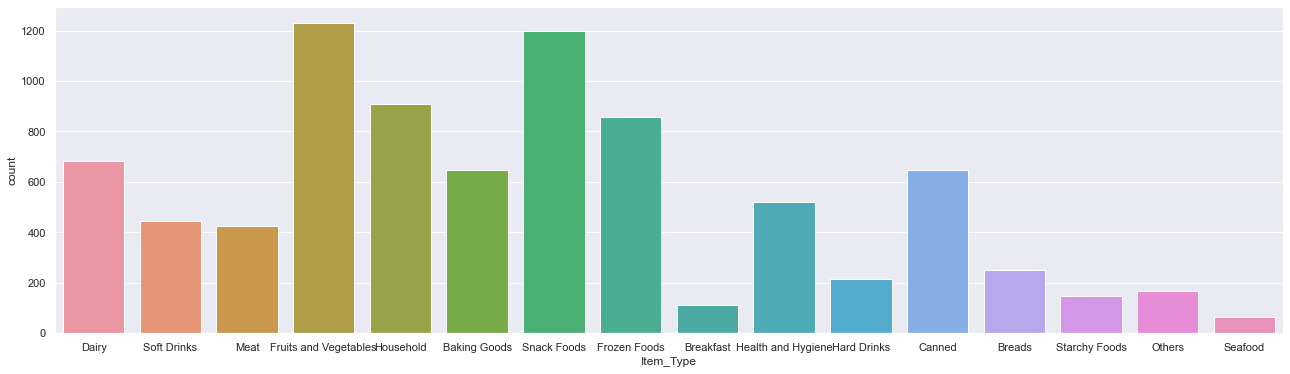

In [26]:
# Item_Type distribution
plt.figure(figsize=(22,6))
sns.countplot(x ='Item_Type', data = train_data)
plt.show()

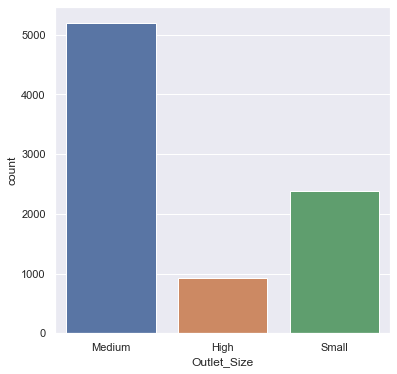

In [27]:
# Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Size', data = train_data)
plt.show()

### Selecting features based on General requirements

In [28]:
train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


## Correlation between features

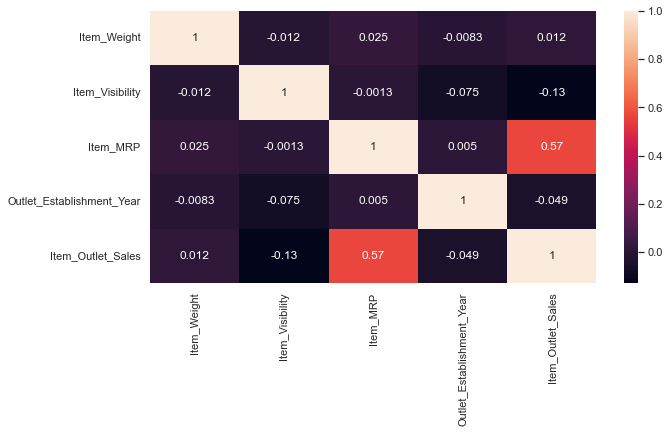

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(), annot =True)
plt.show()

## Data Cleaning

In [30]:
# some cleaning in Item_Fat_Content column
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
train_data.replace({'Item_Fat_Content' : {'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}}, inplace =True)

In [32]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Label Encoding

convert categorical data to numberical data

In [33]:
encoder = LabelEncoder()

In [34]:
# convert categorical data to numberical data on training data
train_data = train_data.apply(encoder.fit_transform)

# splitting our data to train and test

In [35]:
# splitting our data to features and target
x = train_data.drop(columns =['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'], axis=1)
y = train_data['Item_Outlet_Sales']

In [36]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,284,0,664,4,5592,4,1,0,1
1,57,1,880,14,473,8,1,2,2
2,376,0,715,10,2901,4,1,0,1
3,393,1,0,6,4227,3,1,2,0
4,265,0,0,9,627,1,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,125,0,3912,13,4955,1,0,2,1
8519,233,1,3278,0,2023,5,1,1,1
8520,299,0,2302,8,1263,6,2,1,1
8521,149,1,7175,13,1857,8,1,2,2


In [37]:
y

0       2540
1        422
2       1639
3        670
4        865
        ... 
8518    2047
8519     516
8520    1018
8521    1466
8522     697
Name: Item_Outlet_Sales, Length: 8523, dtype: int64

In [190]:
# split our data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=99)

# Standarization

In [191]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,0.352693,3709.198639,7.226681,2941.096562,3.790684,1.170832,1.112871,1.201220
std,95.451067,0.477836,2396.606857,4.209990,1675.483234,2.730322,0.600327,0.812757,0.796459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,0.000000,1595.500000,4.000000,1535.500000,1.000000,1.000000,0.000000,1.000000
50%,326.000000,0.000000,3708.000000,6.000000,2949.000000,4.000000,1.000000,1.000000,1.000000
75%,361.000000,1.000000,5789.500000,10.000000,4351.500000,6.000000,2.000000,2.000000,1.000000
max,415.000000,1.000000,7879.000000,15.000000,5937.000000,8.000000,2.000000,2.000000,3.000000


In [192]:
sc = StandardScaler()

In [193]:
X_train_std =sc.fit_transform(X_train)

In [194]:
X_test_std =sc.transform(X_test)

In [195]:
X_train_std

array([[-3.08771343,  1.35673901,  0.97927844, ..., -0.28991089,
        -0.13460616, -0.24602513],
       [ 0.66486155,  1.35673901, -0.97433367, ..., -0.28991089,
        -0.13460616, -0.24602513],
       [-2.02152221,  1.35673901, -1.44111114, ..., -0.28991089,
        -0.13460616, -0.24602513],
       ...,
       [ 0.6753144 , -0.73706143, -1.55017911, ..., -1.95554127,
         1.09594124, -0.24602513],
       [ 0.86346579, -0.73706143, -1.49919715, ..., -0.28991089,
        -1.36515357, -0.24602513],
       [ 0.81120152, -0.73706143, -1.36714551, ..., -0.28991089,
         1.09594124,  1.01282258]])

In [196]:
X_test_std

array([[ 1.02025862,  1.35673901, -0.74951157, ..., -0.28991089,
        -0.13460616, -0.24602513],
       [ 1.14569288,  1.35673901,  0.95921996, ..., -0.28991089,
        -1.36515357, -0.24602513],
       [ 0.81120152, -0.73706143, -1.36881705, ...,  1.37571948,
        -0.13460616, -0.24602513],
       ...,
       [-1.21665237, -0.73706143,  0.18278974, ...,  1.37571948,
        -0.13460616, -0.24602513],
       [ 0.28855876,  1.35673901,  0.4640263 , ..., -0.28991089,
         1.09594124,  2.27167029],
       [ 0.29901162,  1.35673901, -0.23676674, ..., -0.28991089,
        -0.13460616, -0.24602513]])

In [197]:
Y_train

2373    2632
4262    1061
2713     332
2315    3107
6374    1064
        ... 
5188    1863
7890    1920
1768    1171
3240     730
7203    2492
Name: Item_Outlet_Sales, Length: 7670, dtype: int64

In [198]:
Y_test

2137    1681
562     1049
1049    1440
6778    1613
3914    1265
        ... 
2569    2799
3771     771
261     1185
3286    3449
5479    2789
Name: Item_Outlet_Sales, Length: 853, dtype: int64

# Training the Model

### Linear Regression Model

In [199]:
LR = LinearRegression()

In [200]:
LR.fit(X_train_std, Y_train)

LinearRegression()

In [201]:
Y_pred_LR = LR.predict(X_test_std)

In [202]:
# R squared value
r2_sqr = metrics.r2_score(Y_test, Y_pred_LR)
print('R squared value ', r2_sqr)

R squared value  0.5900723490318834


### Random Forest Model

In [228]:
RF = RandomForestRegressor(n_estimators=1000)

In [229]:
RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [231]:
Y_pref_RF = RF.predict(X_test)

In [232]:
# R squared value
r2_sqr_rf = metrics.r2_score(Y_test, Y_pref_RF)
print('R squared value ', r2_sqr_rf)

R squared value  0.6531152981463743


### XGBoost Regressor

In [207]:
XGB_model = XGBRegressor()

In [208]:
XGB_model.fit(X_train_std, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [209]:
Y_pred_XGB = XGB_model.predict(X_test_std)

In [210]:
# R squared value
r2_sqr_XGB = metrics.r2_score(Y_test, Y_pred_XGB)
print('R squared value ', r2_sqr_XGB)

R squared value  0.6353368681926128


### After using Models I notice That
- Random Forest Algorithm Gives highest Accuracy

# Hyper Parameter Tuning

In [222]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)
grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):    
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.615 using {'n_estimators': 1000}
0.578 (0.001) with: {'n_estimators': 10}
0.614 (0.003) with: {'n_estimators': 100}
0.615 (0.002) with: {'n_estimators': 1000}


In [233]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [234]:
grid_search_forest.best_score_

0.6153389320641223

In [235]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [236]:
metrics.r2_score(Y_test,Y_pred_rf_grid)

0.6538804302869288

# Saving The model

In [237]:
import joblib

In [239]:
joblib.dump(grid_search_forest,r'D:\Model_Market_data\random_forest_grid.sav')


['D:\\Model_Market_data\\random_forest_grid.sav']

In [240]:
model=joblib.load(r'D:\Model_Market_data\random_forest_grid.sav')


In [241]:
model.predict(X_test_std)

array([1301.584, 1508.921, 2864.733, 1915.613,  929.089, 2525.734,
       2368.934, 1372.103,  281.504,   33.274, 1058.581, 1792.893,
       2150.074, 1147.159, 2327.515, 1220.677, 1034.107,  470.542,
       2111.538, 2202.474, 1753.055, 2238.211, 1313.283, 2398.111,
        280.304, 2086.789, 1615.253, 2067.588, 1470.57 , 1222.206,
       1543.358, 2927.32 , 2387.939, 2168.414,  867.337, 1111.031,
       1777.07 , 2338.824, 1033.612, 2550.983, 2842.195, 1182.541,
       1332.807,  889.239, 1312.966, 2147.847,  165.865, 3022.061,
       1538.843, 1454.744, 3220.516,  218.587, 1639.737, 1858.092,
       2003.518,  294.782, 1721.493, 1022.163, 2059.989, 2074.086,
       2033.971,  510.196, 2001.881, 3017.083, 1597.064, 1336.188,
       2396.24 , 1775.259, 2015.875, 1572.257, 1856.375, 1407.208,
        322.74 ,  605.515, 2540.635, 1932.308, 1075.132, 2005.555,
        189.935,   62.809, 1620.575, 2872.403, 2423.576, 3184.854,
       1156.663, 2516.859, 2588.495, 1901.772,  890.514, 1966.